# Assignment 1

## Task 1 – Rough-cut modelling

### 1.1 Olympus Träningscenter Gym

For our example of rough-cut modeling, we choose to model a gym as a system where gym members (later members) are treated as customers and workout stations (later stations) (e.g., cable machines, cardio machines, free-weight, weight machines) are treated as servers. To simplify the system, we are going to assume there are no peak hours in the gym and number of members is equally distributed among the day. For the sake of example and to have a better understanding, we choose the campus gym Olympus Träningscenter (later Olympus), but this could apply to any traditional gym system.

As mentioned before, there are 4 different types of stations with various number of machines/benches available:

- 8 cable machines
  - Average time spent on a cable machine is 5 minutes
- 18 cardio machines
  - Averate time spend on a cardio machine is 30 minutes
- 4 free-weight benches
  - Average time spent on free-weight bench is 10 minutes
- 12 weight machines
  - Average time spent on weight machines bench is 10 minutes

In Olympus it is not as crowded as in bigger commercial gyms and we would say that the average arrival time is 20 members per hour. We have two types of members: 

- ones who focus only on cardio (25% of all members)
  - they only come to the gym to do cardio and do not use other equipment
- other who focus on muscle building
  - They use all types of stations.
  - Each member of this type (simplification) has the same workout routine consisting of starting with cardio, then free-weight, then cable machine, and finishing with weight machine

### 1.2 Formal Notation and Distributions for Queue Modeling

![model](rough-cut-model.drawio_2.png)

# We have 4 queues, one for each station type.

(m/h) = members per hour

## Arrival rates

lambda_justCardio = 5 m/h

lambda_other = 15 m/h

## Cardio (M|M|18)

lambda = 20 m/h

mu = 2 # service rate

service_time = 1/mu = 1/2h

## Free-weights (M|M|4)

lambda = 15 m/h

mu = 6

service_time = 1/mu = 1/6h

## Cable Machines (M|M|8)

lambda = 15 m/h

mu = 12

service_time = 1/mu = 1/12h

## Weight Machines (M|M|12)

lambda = 15 m/h

mu = 6

service_time = 1/mu = 1/6h

### 1.3 Solve model & draw conclusions

In [3]:
import math

# vars
c_cardio = 18
c_free_weight = 4
c_cable = 8
c_weight_machine = 12

lambda_cardio = 20
lambda_free_weight = 15
lambda_cable = 15
lambda_weight_machine = 15

mu_cardio = 2
mu_free_weight = 6
mu_cable = 12
mu_weight_machine = 6


def calculate_rho(lambda_param, c, mu):
    return lambda_param / (c * mu) 

def P0(lambda_, mu, rho, c):
    part1 = sum((lambda_ / mu) ** n / math.factorial(n) for n in range(c))
    part2 = (lambda_ / mu) ** c / (math.factorial(c) * (1 - rho))
    return 1 / (part1 + part2)

def L(c, rho , P0):
    part1 = c * rho
    part2_numerator = (part1 ** (c + 1)) * P0
    part2_denominator = math.factorial(c) * c * ((1 - rho) ** 2)

    part2 = part2_numerator / part2_denominator
    return part1 + part2

def W(L, lambda_param):
    return L / lambda_param

def W_Q(W, mu):
    return W - (1 / mu)

def L_Q(lambda_param, W_Q):
    return lambda_param * W_Q


print("_______")
print("rho:")
rho_cardio = calculate_rho(lambda_cardio, c_cardio, mu_cardio)
rho_free_weight = calculate_rho(lambda_free_weight, c_free_weight, mu_free_weight)
rho_weight_machine = calculate_rho(lambda_weight_machine, c_weight_machine, mu_weight_machine)
rho_cable = calculate_rho(lambda_cable, c_cable, mu_cable)
print(f"rho for Cardio Machines: {rho_cardio:.6f}")
print(f"rho for Free Weights: {rho_free_weight:.6f}")
print(f"rho for Cable Machines: {rho_cable:.6f}")
print(f"rho for Weight Machines: {rho_weight_machine:.6f}")

print("_______")
print("P0:")
P0_cardio = P0(lambda_cardio, mu_cardio, rho_cardio, c_cardio)
P0_free_weight = P0(lambda_free_weight, mu_free_weight, rho_free_weight, c_free_weight)
P0_cable = P0(lambda_cable, mu_cable, rho_cable, c_cable)
P0_weight_machine = P0(lambda_weight_machine, mu_weight_machine, rho_weight_machine, c_weight_machine)
print(f"P0 for Cardio Machines: {P0_cardio:.6f}")
print(f"P0 for Free Weights: {P0_free_weight:.6f}")
print(f"P0 for Cable Machines: {P0_cable:.6f}")
print(f"P0 for Weight Machines: {P0_weight_machine:.6f}")

print("_______")
print("L:")
L_cardio = L(c_cardio, rho_cardio, P0_cardio)
L_free_weight = L(c_free_weight, rho_free_weight, P0_free_weight)
L_cable = L(c_cable, rho_cable, P0_cable)
L_weight_machine = L(c_weight_machine, rho_weight_machine, P0_weight_machine)
print(f"L for Cardio Machines: {L_cardio:.6f}")
print(f"L for Free Weights: {L_free_weight:.6f}")
print(f"L for Cable Machines: {L_cable:.6f}")
print(f"L for Weight Machines: {L_weight_machine:.6f}")

print("_______")
print("W:")
W_cardio = W(L_cardio, lambda_cardio)
W_free_weight = W(L_free_weight, lambda_free_weight)
W_cable = W(L_cable, lambda_cable)
W_weight_machine = W(L_weight_machine, lambda_weight_machine)
print(f"W for Cardio Machines: {W_cardio:.6f}")
print(f"W for Free Weights: {W_free_weight:.6f}")
print(f"W for Cable Machines: {W_cable:.6f}")
print(f"W for Weight Machines: {W_weight_machine:.6f}")

print("_______")
print("W_Q:")
W_Q_cardio = W_Q(W_cardio, mu_cardio)
W_Q_free_weight = W_Q(W_free_weight, mu_free_weight)
W_Q_cable = W_Q(W_cable, mu_cable)
W_Q_weight_machine = W_Q(W_weight_machine, mu_weight_machine)
print(f"W_Q for Cardio Machines: {W_Q_cardio:.6f}")
print(f"W_Q for Free Weights: {W_Q_free_weight:.6f}")
print(f"W_Q for Cable Machines: {W_Q_cable:.6f}")
print(f"W_Q for Weight Machines: {W_Q_weight_machine:.6f}")

print("_______")
print("L_Q:")
L_Q_cardio = L_Q(lambda_cardio, W_Q_cardio)
L_Q_free_weight = L_Q(lambda_free_weight, W_Q_free_weight)
L_Q_cable = L_Q(lambda_cable, W_Q_cable)
L_Q_weight_machine = L_Q(lambda_weight_machine, W_Q_weight_machine)
print(f"L_Q for Cardio Machines: {L_Q_cardio:.6f}")
print(f"L_Q for Free Weights: {L_Q_free_weight:.6f}")
print(f"L_Q for Cable Machines: {L_Q_cable:.6f}")
print(f"L_Q for Weight Machines: {L_Q_weight_machine:.6f}")


_______
rho:
rho for Cardio Machines: 0.555556
rho for Free Weights: 0.625000
rho for Cable Machines: 0.156250
rho for Weight Machines: 0.208333
_______
P0:
P0 for Cardio Machines: 0.000045
P0 for Free Weights: 0.073695
P0 for Cable Machines: 0.286504
P0 for Weight Machines: 0.082085
_______
L:
L for Cardio Machines: 10.019910
L for Free Weights: 3.033095
L for Cable Machines: 1.250009
L for Weight Machines: 2.500003
_______
W:
W for Cardio Machines: 0.500996
W for Free Weights: 0.202206
W for Cable Machines: 0.083334
W for Weight Machines: 0.166667
_______
W_Q:
W_Q for Cardio Machines: 0.000996
W_Q for Free Weights: 0.035540
W_Q for Cable Machines: 0.000001
W_Q for Weight Machines: 0.000000
_______
L_Q:
L_Q for Cardio Machines: 0.019910
L_Q for Free Weights: 0.533095
L_Q for Cable Machines: 0.000009
L_Q for Weight Machines: 0.000003


In [18]:
# Whole system metrics

p_only_cardio = 0.25
p_other = 1 - p_only_cardio

# weighted averages of the metrics

def weighted_average(cardio_metric, free_weight_metric, cable_metric, weight_machine_metric):
    leftSide = (p_only_cardio + p_other) * cardio_metric # 1 * cardio_metric
    rightSide = (p_other *  free_weight_metric) + (p_other * cable_metric) + (p_other * weight_machine_metric)

    return leftSide + rightSide


rho_system = weighted_average(rho_cardio, rho_free_weight, rho_cable, rho_weight_machine)
print(f"rho for the whole system: System is utilized {rho_system:.6f} of the time")

P0_system = weighted_average(P0_cardio, P0_free_weight, P0_cable, P0_weight_machine)
print(f"P0 for the whole system: System is not utilized {P0_system:.6f} of the time")

L_system = weighted_average(L_cardio, L_free_weight, L_cable, L_weight_machine)
print(f"L for the whole system: Avg. {L_system:.2f} people are the system")

W_system = weighted_average(W_cardio, W_free_weight, W_cable, W_weight_machine)
print(f"W for the whole system: Avg. Time spent the system is {W_system:.6f} hours")

W_Q_system = weighted_average(W_Q_cardio, W_Q_free_weight, W_Q_cable, W_Q_weight_machine)
print(f"W_Q for the whole system: Avg. Time spent in queue {W_Q_system:.6f} hours")

L_Q_system = weighted_average(L_Q_cardio, L_Q_free_weight, L_Q_cable, L_Q_weight_machine)
print(f"L_Q for the whole system: Avg. {L_Q_system:.2f} people are in the queue")


rho for the whole system: System is utilized 1.297743 of the time
P0 for the whole system: System is not utilized 0.331759 of the time
L for the whole system: Avg. 15.11 people are the system
W for the whole system: Avg. Time spent the system is 0.840151 hours
W_Q for the whole system: Avg. Time spent in queue 0.027651 hours
L_Q for the whole system: Avg. 0.42 people are in the queue


# Task 2 – Random Number and Variate Generation

2.1 Develop your random number generator according to the Multiplicative Congruential Method and generate a sequence of 30 numbers for each of the following cases:


a) X0 = 8, a = 13, m = 16 

b) X0 = 8, a = 11, m = 30 

c) X0 = 7, a = 7, m = 16 

d) X0 = 8, a = 7, m = 25

2.2 Verify uniformity and independence of the sequences generated in 2.1. Describe how you apply the methods and compare the results (e.g., by using a table).

2.3 Develop a Random Variate Generator for the following distribution:

In [4]:

# a * x0 % m
# X1 = [43(117)]mod 1, 000 = 31, R1 = 31/1000 = .031

# R -> between 0 - 1 -> Xi / m

N = 30
PRINT_EACH_STEP = True

def multiplicative_congruential_method(x0, a, m , n):
    sequence = [x0]
    r_sequence = []
    firstR = x0 / m
    r_sequence.append(firstR)
    
    for i in range(n-1):
        Xi = (a * sequence[-1]) % m 
        sequence.append(Xi)
        Ri = Xi / m
        r_sequence.append(Ri)
        if PRINT_EACH_STEP:
            print(f"X{i+1} = [{a}({sequence[-1]})]mod {m} = {Xi}")
            print(f"R{i+1} = {Xi}/{m} = {Ri}")

    return r_sequence

print(multiplicative_congruential_method(117, 43, 1000, 4))

# case 1
print("Case 1")
case_1 = multiplicative_congruential_method(8, 13, 16, N)
print(case_1)
print("_______")
print("Case 2")
case_2 = multiplicative_congruential_method(8, 11, 30, N)
print(case_2)
print("_______")
print("Case 3")
case_3 = multiplicative_congruential_method(7, 7, 16, N)
print(case_3)
print("_______")
print("Case 4")
case_4 = multiplicative_congruential_method(8, 7, 25, N)
print(case_4)
print("_______")


X1 = [43(117)]mod 1000 = 31
R1 = 31/1000 = 0.031
X2 = [43(31)]mod 1000 = 333
R2 = 333/1000 = 0.333
X3 = [43(333)]mod 1000 = 319
R3 = 319/1000 = 0.319
[0.117, 0.031, 0.333, 0.319]


<table>
    <tr>
        <td><img src="./A3_1.png" alt="A3_1"></td>
        <td><img src="./A3_2.png" alt="A3_2"></td>
    </tr>
</table>

In [5]:
import math

alpha = 0.05

def frequency_test(numbers):
    # step 1
    numbers.sort()
    # step 2
    N = len(numbers)
    D_plus_arr = []
    D_minus_arr = []
    D = 0
    for i in range(len(numbers)):
        j = i + 1
        R_i = numbers[i]
        D_plus_i = j/N - R_i
        D_minus_i = R_i - (j-1)/N
        D_plus_arr.append(D_plus_i)
        D_minus_arr.append(D_minus_i)
    D_plus = max(D_plus_arr)
    D_minus = max(D_minus_arr)
    # step 3
    D = max(D_plus, D_minus)
    print(f"D: {D}")
    # step 4 -> read D_alpha from the table
    D_alpha = 1.36 / math.sqrt(N)

    # step 5
    if D <= D_alpha:
        print("The numbers are uniformly distributed")
    else:
        print("The numbers are not uniformly distributed")

# print("_______ FREQUENCY TEST _______")
# print("Case 1")
# frequency_test(case_1)
# print("_______")
# print("Case 2")
# frequency_test(case_2)
# print("_______")
# print("Case 3")
# frequency_test(case_3)
# print("_______")
# print("Case 4")
# frequency_test(case_4)


print("_______ AUTOCORRELATION TEST _______")

lag = 4

def autocorrelation_test(sequence, lag = 1):
    N = len(sequence)
    M = (N - lag) - 1
    mean_sequence = sum(sequence) / N
    print(f"Mean: {mean_sequence}")
    print(f"M: {M}")
    print(f"N: {N}")
    
    autocorr_num = sum((sequence[i] - mean_sequence) * (sequence[i + lag] - mean_sequence) for i in range(M +1))
    autocorr_denom = sum((sequence[i] - mean_sequence) ** 2 for i in range(M + 1))

    if autocorr_denom == 0:
        print("variance is 0, all values are the same, f the teachers numbers")
        return None, None, False
    
    
    autocorr = autocorr_num / autocorr_denom
    # step 3
    sigma_rho = math.sqrt((13 * M + 7)) / (12 * (M+1))
    
    # step 4
    Z0 = autocorr / sigma_rho
    
    # step 5
    Z_alpha = 1.96 # from the table

    return Z0, Z_alpha , -Z_alpha <= Z0 <= Z_alpha


print("Case 1")
print(autocorrelation_test(case_1, lag))
print("_______")
print("Case 2")
print(autocorrelation_test(case_2, lag))
print("_______")
print("Case 3")
print(autocorrelation_test(case_3, lag))
print("_______")
print("Case 4")
print(autocorrelation_test(case_4, lag))

_______ AUTOCORRELATION TEST _______
Case 1
Mean: 0.5
M: 25
N: 30
variance is 0, all values are the same, f the teachers numbers
(None, None, False)
_______
Case 2
Mean: 0.6000000000000002
M: 25
N: 30
(17.123224558391694, 1.96, False)
_______
Case 3
Mean: 0.25
M: 25
N: 30
(17.123224558391694, 1.96, False)
_______
Case 4
Mean: 0.48533333333333334
M: 25
N: 30
(17.123224558391694, 1.96, False)


# 2.3
Develop a Random Variate Generator for the following distribution:

![pdf](./T2_3_cdf.png)

In [75]:
# inverse transform sampling method.
import random

import numpy as np

SEED = 1
NUMBER_OF_SAMPLES = 1000

# Step 0: Generate random numbers
def generate_array_of_random_numbers(seed, number_of_samples):
    random.seed(seed)
    return [random.random() for _ in range(number_of_samples)]
    
random_uniform_numbers = generate_array_of_random_numbers(SEED, NUMBER_OF_SAMPLES)
print("##################")
print(random_uniform_numbers)
print("##################")


# Step 1: Transform pdf from the image above to a function
# f(x) = 0 for x < 2
# f(x) = 1/2(x-2) for 2 <= x <= 3
# f(x) = 1/2(2-x/3) for 3 < x <= 6
# f(x) = 0 for x > 6
def pdf(x):
    if x >= 2 and x <= 3:
        return 0.5 * (x - 2)
    elif x > 3 and x <= 6:
        return 0.5 * (2 - x / 3)
    else:
        return 0
    
# Step 2: Define the CDF for each segment
def cdf(x):
    if 2 <= x <= 3:
        return 0.25 * x**2 - x + 1
    elif 3 < x <= 6:
        return (-1/12) * x**2 + x - 1.75
    elif x < 2:
        return 0
    else:  # x > 6
        return 1
    

# Step 3: Derive the inverse CDF for each segment
def inverse_cdf(U):

    if U <= 0.25:
        # For 2 <= x <= 3
        x = 2 + 2 * math.sqrt(U)
        if (x < 2):
            print(f"U: {U} x: {x}")
        return 2 + 2 * math.sqrt(U)  # First part of the piecewise function
    else:
        x = 6 - 3 * math.sqrt(2 * (1 - U))
        # For 3 < x <= 6
        if (x < 2):
            print(f"U: {U} x: {x}")
        
        return 6 - 3 * math.sqrt(2 * (1 - U))  # Second part of the piecewise function

    
def inverse_cdf_2(u):
    if u < 0.5:
        # For 2 <= x <= 3
        return  2 + np.sqrt(2 * u)
    # Perform F(x) = F2(x)
    else:
        # For 3 < x <= 6
       return 6 - 3 * np.sqrt(2 * (1 - u))



# Step 4: Generate random variates
def generate_random_variates(random_numbers):
    return [inverse_cdf(u) for u in random_numbers]

random_variates = generate_random_variates(random_uniform_numbers)
print("##################")
print(random_variates)
print("##################")

##################
[0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095, 0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631, 0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014, 0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536, 0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338, 0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263, 0.2308665415409843, 0.2187810373376886, 0.4596034657377336, 0.28978161459048557, 0.021489705265908876, 0.8375779756625729, 0.5564543226524334, 0.6422943629324456, 0.1859062658947177, 0.9925434121760651, 0.8599465287952899, 0.12088995980580641, 0.3326951853601291, 0.7214844075832684, 0.7111917696952796, 0.9364405867994596, 0.4221069999614152, 0

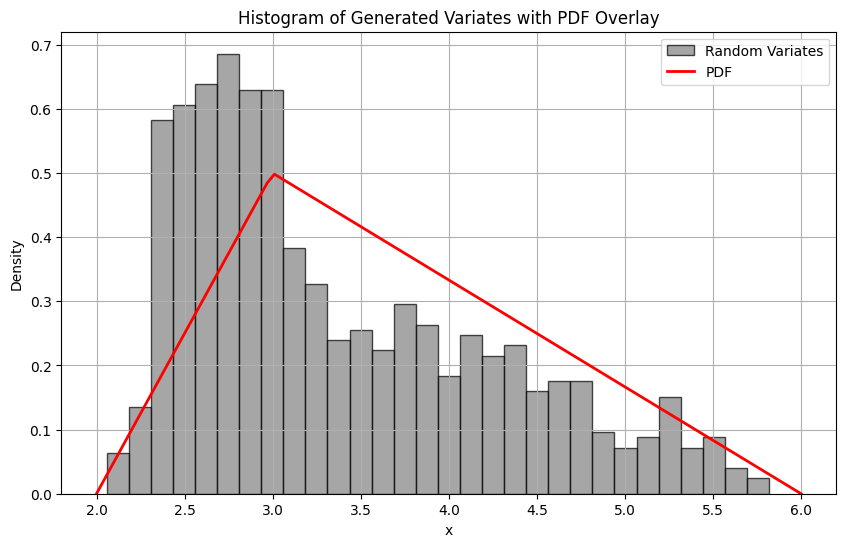

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(random_variates, bins=30, density=True, alpha=0.7, color='grey', edgecolor='black', label='Random Variates')

x = np.linspace(2, 6, 100)
y = np.piecewise(x, [x <= 3, (x > 3) & (x <= 6)], [lambda x: 0.5 * (x - 2), lambda x: 0.5 * (2 - x / 3)])

plt.plot(x, y, color='red', linewidth=2, label='PDF')
plt.title('Histogram of Generated Variates with PDF Overlay')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


In [74]:

# Example usage
u_value = 0.2550690257394217  # Example value for U
result = inverse_cdf(u_value)
print(result)  # This will return a value in the range (3, 6]

U: 0.2550690257394217 x: 1.5152328594412374
1.5152328594412374
